# **Implement a KNN model to classify the animals in to categorie**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [3]:
zoo = pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.drop("animal name", axis = 1, inplace = True)
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
# value count for glass types
zoo.type.value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

# **Data Exploration and Visualization**

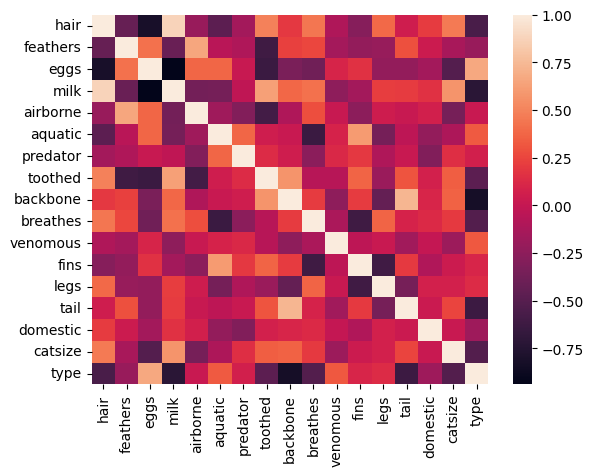

In [6]:
# correlation matrix
cor = zoo.corr()
sns.heatmap(cor);

In [7]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [8]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow") for i in zoo.hair]

In [10]:
# with this set function we find unique values in a list...
unique_list = list(set(color_list))
unique_list

['blue', 'red']

# **Plotting scatter matrix**

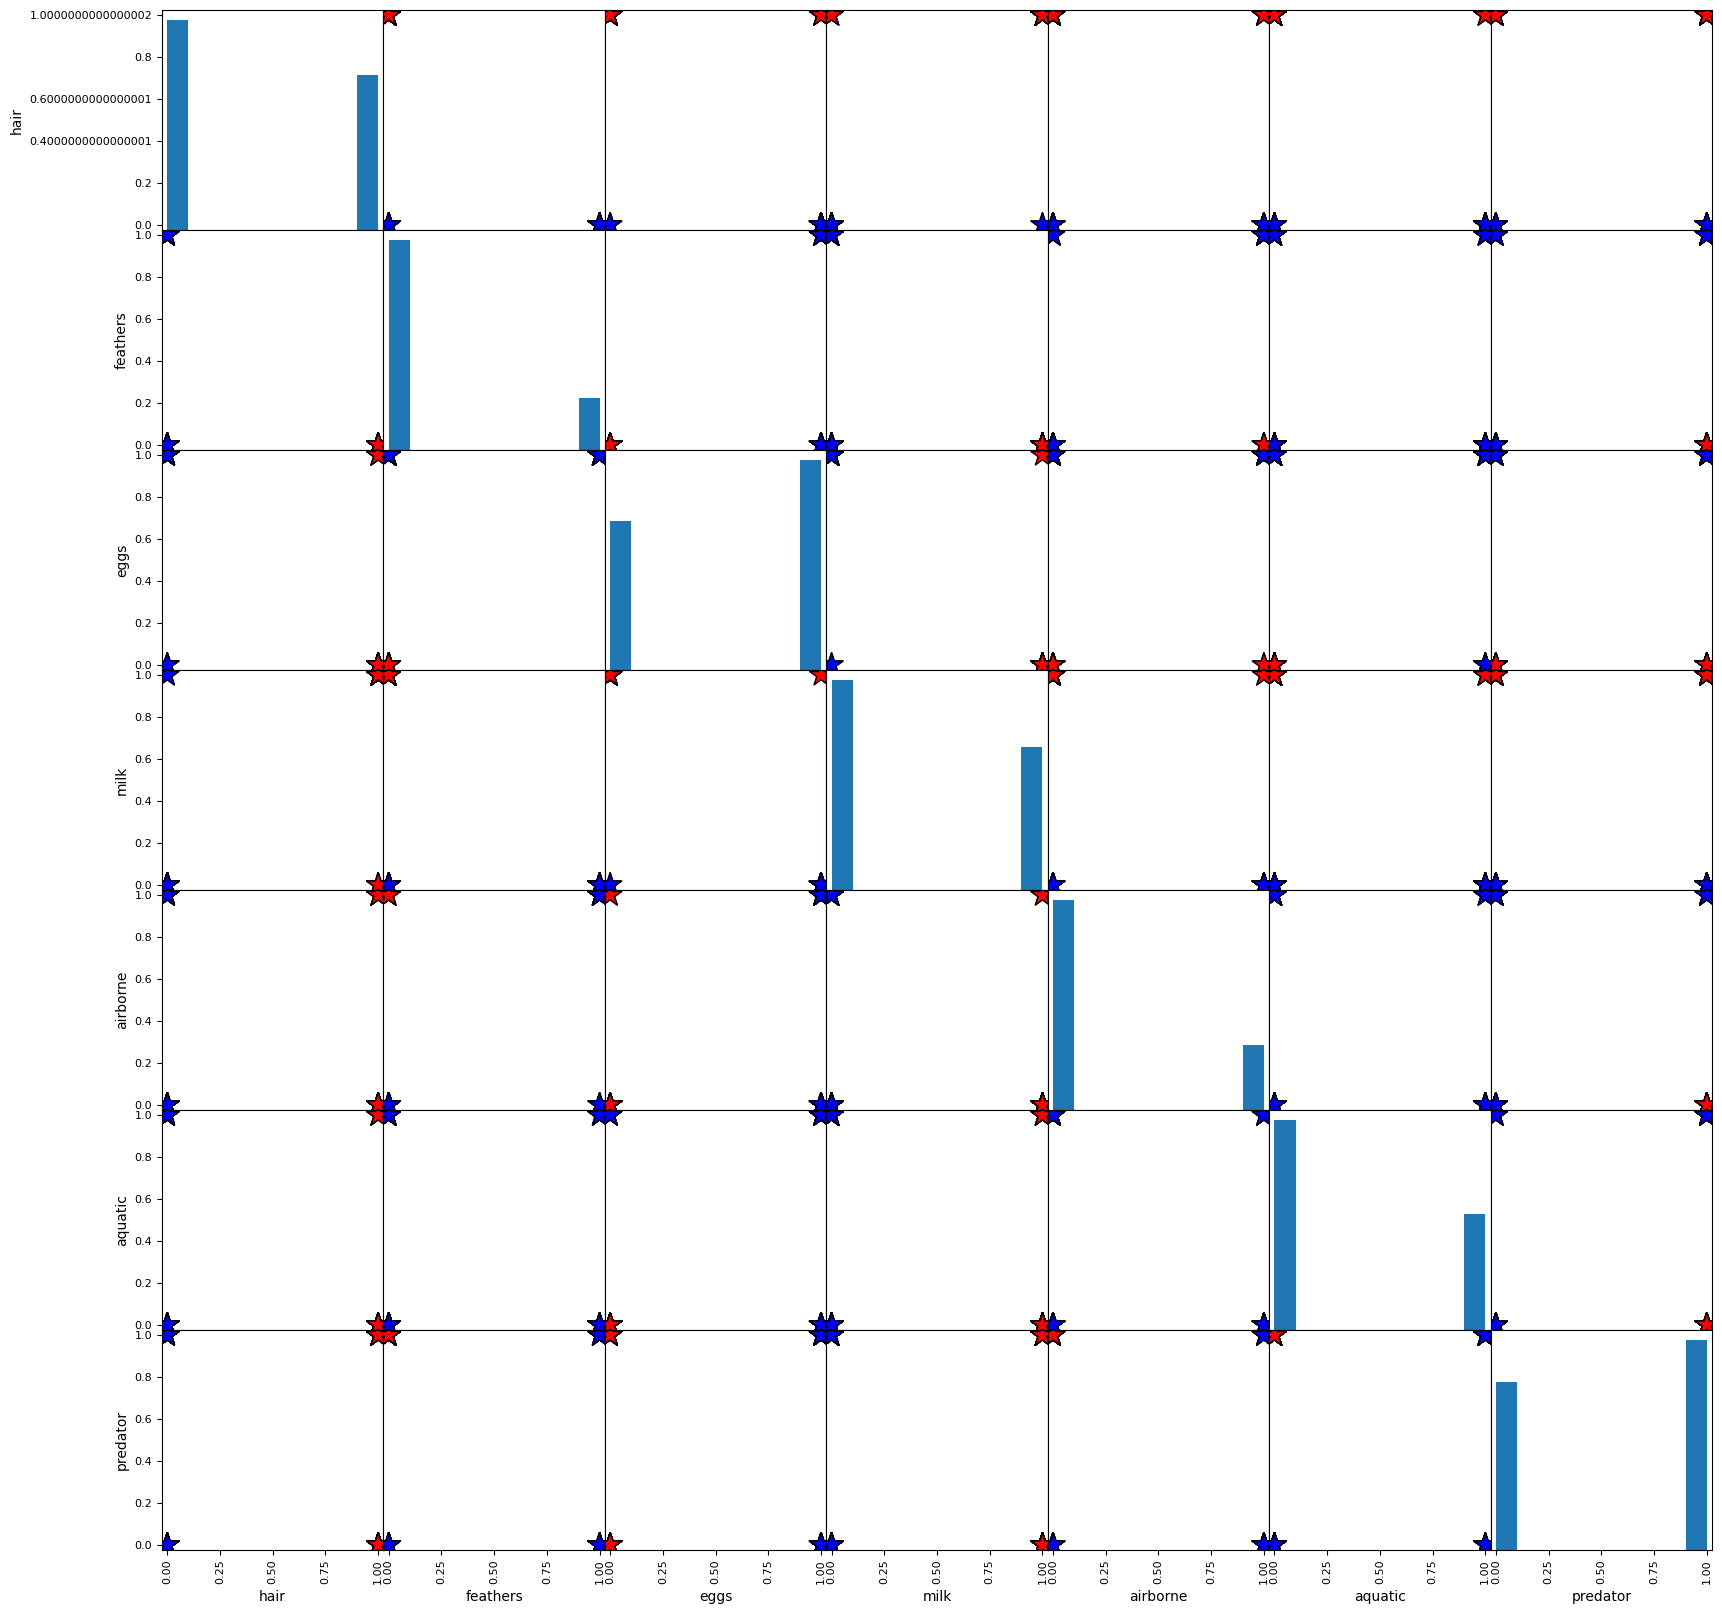

In [11]:
pd.plotting.scatter_matrix(zoo.iloc[:,:7],
                           c = color_list,
                           figsize = [20,20],
                           diagonal = "hist",
                           alpha = 1,
                           s = 300,
                           marker = "*",
                           edgecolor = "black")
plt.show()

Visualizing has hair or not?

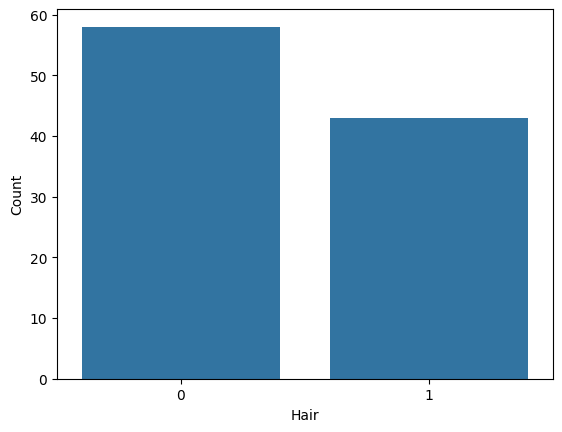

hair
0    58
1    43
Name: count, dtype: int64

In [12]:
sns.countplot(x = "hair", data = zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,"hair"].value_counts()

# **KNN**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = zoo.loc[:,zoo.columns != "hair"], zoo.loc[:,"hair"]
knn.fit(x,y)
prediction = knn.predict(x)
print("Prediction =", prediction)

Prediction = [1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]


# **Train Test Split**

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = zoo.loc[:,zoo.columns != "hair"], zoo.loc[:,"hair"]
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("with KNN (K = 1) accuracy is:", knn.score(x_test,y_test))  # accuracy

with KNN (K = 1) accuracy is: 0.967741935483871


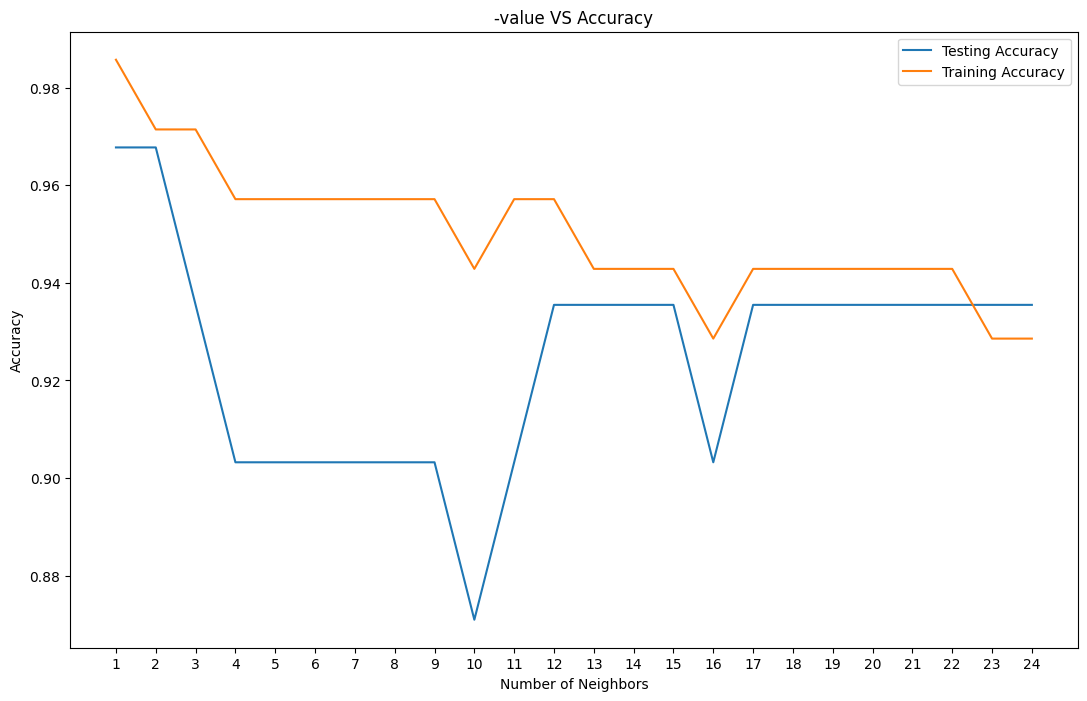

Best accuracy is 0.967741935483871 with K = 1


In [15]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(k_values):
  # k from 1 to 25(exclude)
  knn = KNeighborsClassifier(n_neighbors = k)
  # fit with knn
  knn.fit(x_train, y_train)
  # train accuracy
  train_accuracy.append(knn.score(x_train, y_train))
  # test accuracy
  test_accuracy.append(knn.score(x_test, y_test))

#Plot
plt.figure(figsize = [13,8])
plt.plot(k_values, test_accuracy, label = "Testing Accuracy")
plt.plot(k_values, train_accuracy, label = "Training Accuracy")
plt.legend()
plt.title("-value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.savefig("grap.png")
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))

# **Visualizing Eggs and Hair on Scatter**

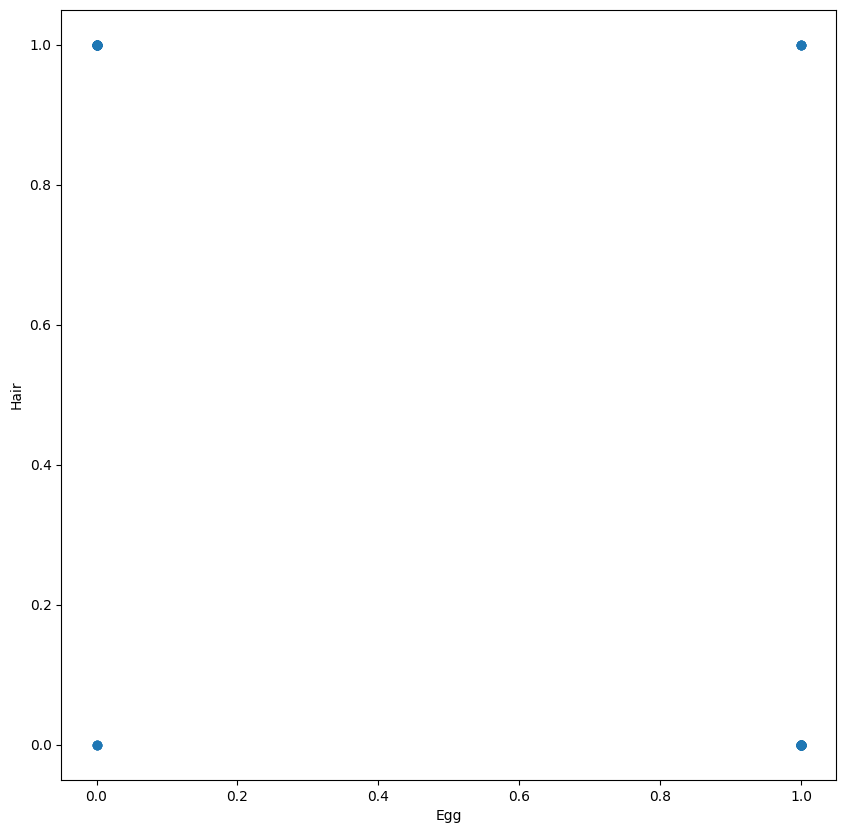

In [16]:
x = np.array(zoo.loc[:,"eggs"]).reshape(-1,1)
y = np.array(zoo.loc[:, "hair"]).reshape(-1,1)

plt.figure(figsize = [10,10])
plt.scatter(x = x, y = y)
plt.xlabel("Egg")
plt.ylabel("Hair")
plt.show()

# **Linear Regression**

R^2 Score: 0.6681125904754137


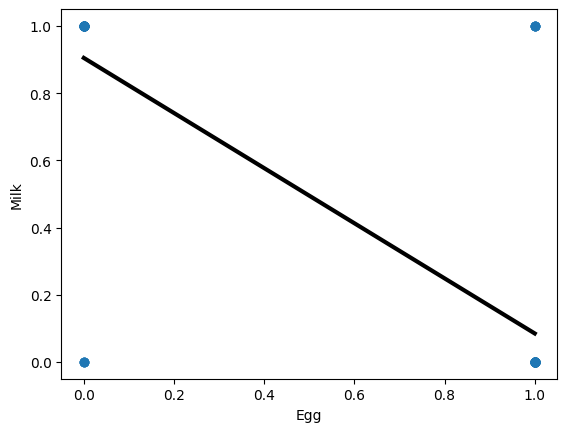

In [17]:
# Plotting regression line and scatter
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
regression.fit(x,y)
predicted = regression.predict(predict_space)

print("R^2 Score:", regression.score(x,y))

plt.plot(predict_space, predicted, color = "black", linewidth = 3)
plt.scatter(x = x, y = y)
plt.xlabel("Egg")
plt.ylabel("Milk")
plt.show()

# **Cross Validation**

In [18]:
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
k = 5
cv_result = cross_val_score(regression,x,y,cv=k)
print("CV Scores:", cv_result)
print("CV Average:", np.sum(cv_result)/k)

CV Scores: [0.80171562 0.61914032 0.79243817 0.24939434 0.76176534]
CV Average: 0.6448907578047475


# **Ridge**

In [19]:
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.001)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print("Ridge Score:", ridge.score(x_test,y_test))

Ridge Score: 0.9306068369925709


# **Lasso**

In [20]:
from sklearn.linear_model import Lasso
x = np.array(zoo.loc[:,["eggs", "airborne", "fins", "legs", "hair","type"]])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.0001)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print("Lasso score:", lasso.score(x_test,y_test))
print("Lasso coefficients:", lasso.coef_)

Lasso score: 0.9999998378928996
Lasso coefficients: [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  3.15079999e-05
  9.99427929e-01 -5.34134866e-05]


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = zoo.loc[:,zoo.columns != "hair"], zoo.loc[:,"hair"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n", cm)
print("Classification Report: \n", classification_report(y_test,y_pred))

Confusion Matrix: 
 [[15  0]
 [ 0 16]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



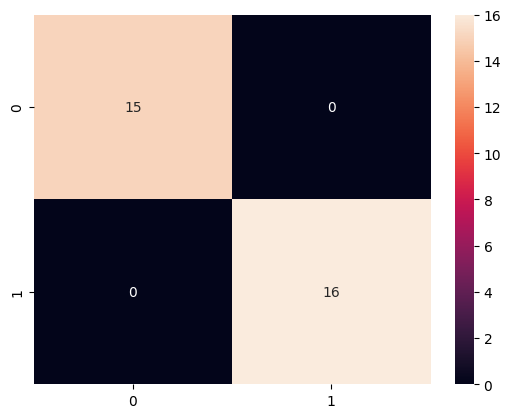

In [22]:
sns.heatmap(cm,annot = True, fmt = "d")
plt.show()

# **Logistic Regression**

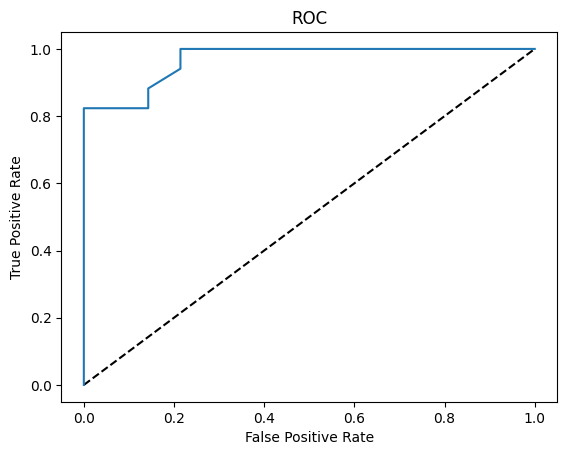

In [23]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
#hair = 1 no = 0
x,y = zoo.loc[:,(zoo.columns != "hair")], zoo.loc[:,"hair"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Plot ROC Curve
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

In [24]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {"n_neighbors": np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 3)  # GridSearchCV
knn_cv.fit(x,y)  # Fit

# Print Hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_))
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 1}
Best score: 0.9402852049910874


In [25]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {"C" : np.logspace(-3,3,7), "penalty": ["l1", "l2"]}
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv = 3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("TUned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

TUned hyperparameters : {'C': 0.01, 'penalty': 'l2'}
Best Accuracy: 0.9299516908212562


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [26]:
# get_dummies
df = pd.get_dummies(zoo)
df.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


# **Support Vector Machine**

In [28]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [("scalar", StandardScaler()),
         ("SVM", SVC())]
pipeline = Pipeline(steps)
parameters = {"SVM__C":[1, 10,100],
              "SVM__gamma":[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)
cv = GridSearchCV(pipeline,param_grid = parameters, cv = 3)
cv.fit(x_train, y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tunned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9523809523809523
Tunned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


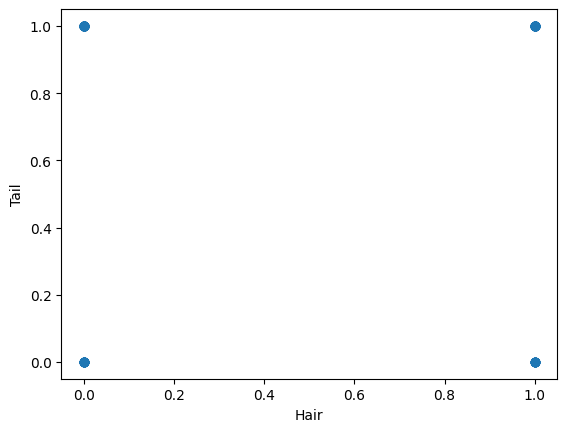

In [30]:
plt.scatter(zoo["hair"],zoo["tail"])
plt.xlabel("Hair")
plt.ylabel("Tail")
plt.show()

# **K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


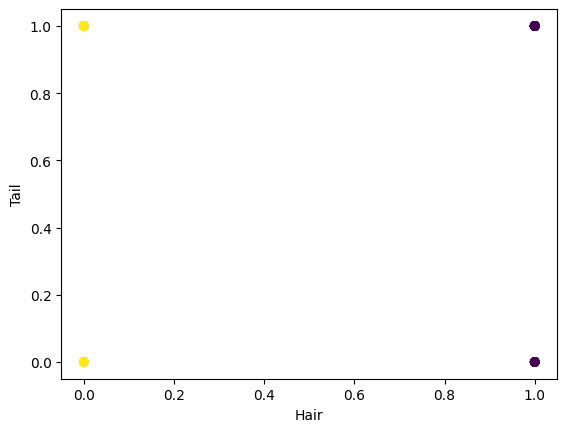

In [32]:
data2 = zoo.loc[:,["tail", "hair"]]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(zoo["hair"], zoo["tail"], c = labels)
plt.xlabel("Hair")
plt.ylabel("Tail")
plt.show()

In [33]:
# cross tabulation table
df = pd.DataFrame({"labels" : labels, "hair" : zoo["hair"]})
ct = pd.crosstab(df["labels"], df["hair"])
print(ct)

hair     0   1
labels        
0        0  43
1       58   0


# **INERTIA**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

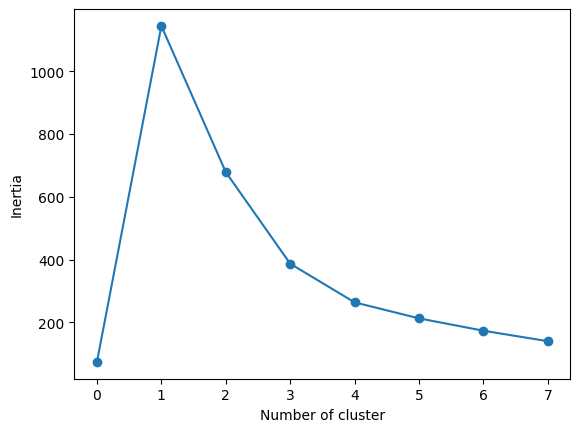

In [39]:
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(zoo)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8), inertia_list, "-o")
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()
# we choose the elbow < 1

In [40]:
data2 = zoo.drop("hair", axis = 1)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar, kmeans)
pipe.fit(data2)
labels = pipe.predict(data2)
df = pd.DataFrame({"labels":labels, "hair":zoo["hair"]})
ct = pd.crosstab(df["labels"],df["hair"])
print(ct)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


hair     0   1
labels        
0        2  39
1       56   4


# **Dendrogram**

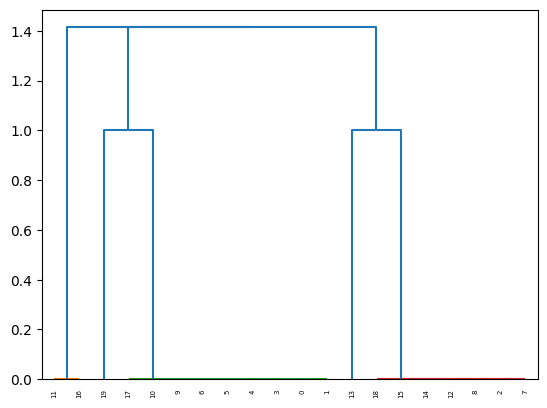

In [44]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data2.iloc[:20, 0:5], method = "single")
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 5)
plt.show()

# **T-Distributed Stochastic Neighbor Embedding**

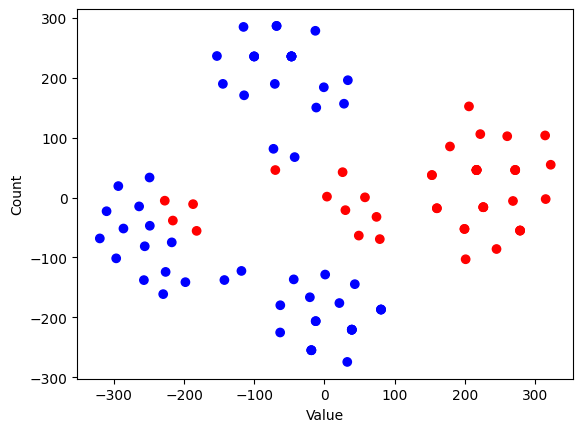

In [45]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100, random_state = 42)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()